In [9]:
#One hot encoding of race and remove one column(maybe mixed)
#Paste smote loop from former Notebook
#Metrics, Graphs, and CNF Matrix

In [23]:
import numpy as np
import pandas as pd

In [24]:
data = pd.read_csv('datasets/risk_dataset_2.csv', header=None )
data.columns = ['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 
              'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'training', 'count']

In [25]:
data.head(25)

,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
0,0,1,1,1,0,1,0,0,0,0,9,9,0,0,1,3
1,0,1,1,1,0,1,0,0,0,9,9,9,0,0,0,2
2,0,1,1,1,0,1,0,0,0,9,9,9,0,0,1,3
3,0,1,1,1,0,1,1,0,0,0,9,9,0,0,1,1
4,0,1,1,1,0,1,1,0,1,9,9,9,0,0,1,1
5,0,1,1,1,0,1,2,0,0,0,9,9,0,0,1,1
6,0,1,1,1,0,1,2,0,0,9,9,9,0,0,1,1
7,0,1,1,1,0,1,2,0,1,0,9,9,0,0,1,1
8,0,1,1,1,0,1,9,0,0,9,9,9,0,0,1,1
9,0,1,1,1,0,2,0,0,0,0,9,9,0,0,0,1


In [26]:
X = data[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']]
y = data['cancer']

In [27]:
#replace unknowns with null
cols = ['menopaus', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 
        'brstproc', 'lastmamm', 'surgmeno', 'hrt']
X[cols] = X[cols].replace({9:np.nan})
X.head(25)

/Users/olohireme/miniforge3/envs/mlp/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt
0,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
2,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,0.0,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,0.0,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN
5,0.0,1,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,NaN,NaN
6,0.0,1,1.0,1.0,0.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN
7,0.0,1,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,NaN,NaN
8,0.0,1,1.0,1.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN
9,0.0,1,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN


In [28]:
X.dtypes

menopaus     float64
age_grp        int64
density      float64
race         float64
hispanic     float64
bmi          float64
age_first    float64
nrelbc       float64
brstproc     float64
lastmamm     float64
surgmeno     float64
hrt          float64
dtype: object

In [29]:
X.shape

(181903, 12)

In [30]:
#remove rows that have less than 3 known feature with exception of invasive, count, cancer & training
X = X[X.isnull().sum(axis=1) < 9]

In [31]:
X.shape

(181105, 12)

0.4% of the data had > 9 unknown relevant features. This was removed.

In [32]:
X.tail(25)

,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt
181836,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,0.0,NaN,NaN,NaN
181837,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,0.0,NaN,NaN,NaN
181838,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.0,NaN,NaN
181839,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.0,NaN,NaN
181840,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN
181841,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN
181842,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,NaN,0.0,NaN,NaN
181843,NaN,4,NaN,NaN,NaN,NaN,2.0,1.0,NaN,0.0,NaN,NaN
181844,NaN,4,NaN,NaN,NaN,NaN,2.0,NaN,0.0,0.0,NaN,NaN
181845,NaN,4,NaN,NaN,NaN,NaN,2.0,NaN,0.0,0.0,NaN,NaN


In [34]:
#KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)


In [39]:
X.head(25)

,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt
0,0,1,1,1,0,1,0,0,0,0,0,0
1,0,1,1,1,0,1,0,0,0,0,0,0
2,0,1,1,1,0,1,0,0,0,0,0,0
3,0,1,1,1,0,1,1,0,0,0,0,0
4,0,1,1,1,0,1,1,0,1,0,0,0
5,0,1,1,1,0,1,2,0,0,0,0,0
6,0,1,1,1,0,1,2,0,0,0,0,0
7,0,1,1,1,0,1,2,0,1,0,0,0
8,0,1,1,1,0,1,0,0,0,0,0,0
9,0,1,1,1,0,2,0,0,0,0,0,0


In [37]:
#convert back to ints
X[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']] = X[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']].astype(int)


In [41]:
#one hot encode race
X = pd.get_dummies(X, columns=["race"], drop_first=True)
X.head(25)

,menopaus,age_grp,density,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt,race_2,race_3,race_4,race_5
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0
5,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0
6,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0
7,0,1,1,0,1,2,0,1,0,0,0,0,0,0,0
8,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression

models = []
model_lr = LogisticRegression()
models.append(model_lr)
model_svm = svm.SVC()
models.append(model_svm)
g_boost = GradientBoostingClassifier(n_estimators=450, random_state=0)
models.append(g_boost)

In [43]:
#subplots row for each sampling ratio and column for each model.
#plot against model names
train_accuracy = np.zeros((4,3))
val_accuracy = np.zeros((4,3))
test_accuracy = np.zeros((4,3)) 
#plot against model name
train_precision = np.zeros((4,3)) 
val_precision = np.zeros((4,3))
test_precision = np.zeros((4,3))
#plot against model name
train_recall = np.zeros((4,3))
val_recall = np.zeros((4,3))
test_recall = np.zeros((4,3))
#plot against model name
train_auc = np.zeros((4,3))
val_auc = np.zeros((4,3)) 
test_auc = np.zeros((4,3)) 

In [47]:
%%time
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
minority_ratios = [0.25, 0.3, 0.4, 0.5]
#Randomly oversample minority data with the ratios above to get best performance
for idx,r in enumerate(minority_ratios):
    X = data[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']]
    y = data['cancer']
    #split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # randomly oversample minority
    sm = SMOTE(sampling_strategy = r, random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train, y_train)    

    #split train into train and val
    X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.1, random_state=42)

    #call models
    for jdx, m in enumerate(models):
        #compute training metrics
        m.fit(X_train, y_train)
        train_accuracy[idx][jdx] = metrics.accuracy_score(y_train, m.predict(X_train))
        print("r,m,accuracy",r,m,train_accuracy[idx])
        train_precision[idx][jdx] = metrics.precision_score(y_train, m.predict(X_train), zero_division=0)
        train_recall[idx][jdx] = metrics.recall_score(y_train, m.predict(X_train))
        fpr, tpr, thresholds = metrics.roc_curve(y_train, m.predict(X_train))
        train_auc[idx][jdx] = metrics.auc(fpr, tpr)
        #compute validation metrics
        m.fit(X_val, y_val)
        val_accuracy[idx][jdx] = metrics.accuracy_score(y_val, m.predict(X_val))
        val_precision[idx][jdx] = metrics.precision_score(y_val, m.predict(X_val), zero_division=0)
        val_recall[idx][jdx] = metrics.recall_score(y_val, m.predict(X_val))
        fpr, tpr, thresholds = metrics.roc_curve(y_val, m.predict(X_val))
        val_auc[idx][jdx] = metrics.auc(fpr, tpr)
        print("r,m,auc",r,m,val_auc[idx])
        #test prediction and metrics
        test_accuracy[idx][jdx] = metrics.accuracy_score(y_test, m.predict(X_test))
        test_precision[idx][jdx] = metrics.precision_score(y_test, m.predict(X_test), zero_division=0)
        test_recall[idx][jdx] = metrics.recall_score(y_test, m.predict(X_test))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, m.predict(X_test))
        test_auc[idx][jdx] = metrics.auc(fpr, tpr)
        print("r,m,precision",r,m,test_precision[idx])


r,m,accuracy 0.25 LogisticRegression() [0.79985575 0.         0.        ]
r,m,auc 0.25 LogisticRegression() [0.5 0.  0. ]
r,m,precision 0.25 LogisticRegression() [0. 0. 0.]
r,m,accuracy 0.25 SVC() [0.79985575 0.85279901 0.        ]
r,m,auc 0.25 SVC() [0.5        0.53853684 0.        ]
r,m,precision 0.25 SVC() [0.         0.21107266 0.        ]
r,m,accuracy 0.25 GradientBoostingClassifier(n_estimators=450, random_state=0) [0.79985575 0.85279901 0.87750544]
r,m,auc 0.25 GradientBoostingClassifier(n_estimators=450, random_state=0) [0.5        0.53853684 0.7632177 ]
r,m,precision 0.25 GradientBoostingClassifier(n_estimators=450, random_state=0) [0.         0.21107266 0.21143474]
r,m,accuracy 0.3 LogisticRegression() [0.76927569 0.         0.        ]
r,m,auc 0.3 LogisticRegression() [0.5 0.  0. ]
r,m,precision 0.3 LogisticRegression() [0. 0. 0.]
r,m,accuracy 0.3 SVC() [0.76927569 0.84516176 0.        ]
r,m,auc 0.3 SVC() [0.5        0.62474368 0.        ]
r,m,precision 0.3 SVC() [0.        

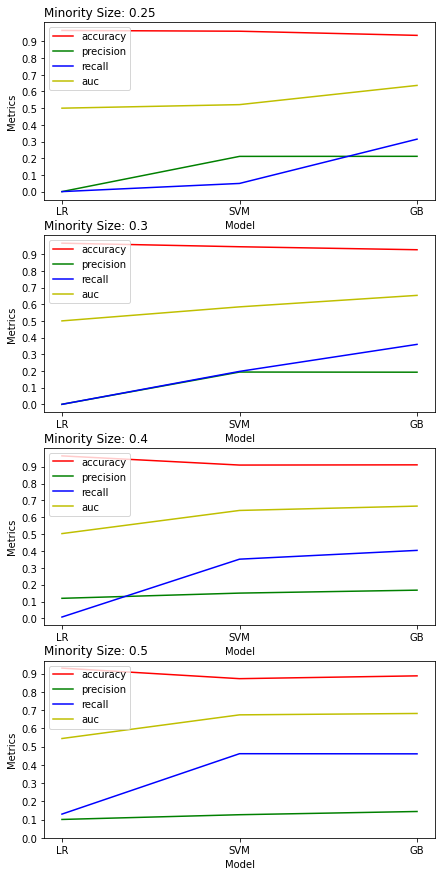

In [49]:
#plot training metrics
import matplotlib.pyplot     as plt
model_names = ["LR", "SVM", "GB"]
fig, axs = plt.subplots(4, 1,figsize=(7,15))
for r, ratio in enumerate(minority_ratios):

    axs[r].set_title(label = "Minority Size: {0}".format(ratio), loc='left')
    axs[r].plot(model_names, test_accuracy[r], color='r', label='accuracy')
    axs[r].plot(model_names, test_precision[r], color='g', label='precision')
    axs[r].plot(model_names, test_recall[r], color='b', label='recall')
    axs[r].plot(model_names, test_auc[r], color='y', label='auc')

    # Naming the x-axis, y-axis and the whole graph
    axs[r].set_xlabel("Model")
    axs[r].set_ylabel("Metrics")
    axs[r].set_yticks(np.arange(0, 1, step=0.1))

    # Adding legend, which helps us recognize the curve according to it's color
    axs[r].legend()

# To load the display window
plt.show()

In [ ]:
#confusion matrix for best model
#print best model metrics
#still bad? use NN architecture in the first notebook